
# Picture notebook!

In [1]:
using Plots
using DelimitedFiles

In [2]:
function avg(AU, dims=1)
    sum(AU,dims=dims)/size(AU,dims)
end

function err(vec)
    sqrt(sum((vec .- avg(vec)) .^ 2 ) / length(vec)^2)
end

err (generic function with 1 method)

## Model Selection

In [3]:
try_max = 22
T = 20

nobs_set=[10,50]
nobstot=length(nobs_set)

AUSI = zeros(nobstot,try_max,T)
AUSEIR = zeros(nobstot,try_max,T)
AUSEIR1 = zeros(nobstot,try_max,T)
planted = zeros(nobstot,try_max,T)
gener =  zeros(nobstot,try_max,T)
n_seir =  zeros(nobstot,try_max,T)
n_si = zeros(nobstot,try_max,T)
path = "./ModelSelection/MarkovMS/"
for i=1:nobstot
    nobs=nobs_set[i]
    for trial in 1:try_max
        AUSI[i,trial,:] = readdlm("$(path)/nobs=$(nobs)/try$(trial)_AUcauSI.txt")
        AUSEIR1[i,trial,:] = readdlm("$(path)/nobs=$(nobs)/try$(trial)_AUcauSEIR1.txt")
        AUSEIR[i,trial,:] = readdlm("$(path)/nobs=$(nobs)/try$(trial)_AUcauSEIR.txt")
        planted[i,trial,:] = readdlm("$(path)/nobs=$(nobs)/try$(trial)_planted.txt") .* 1000
        gener[i,trial,:] = readdlm("$(path)/nobs=$(nobs)/try$(trial)_gener.txt")
        n_seir[i,trial,:] = readdlm("$(path)/nobs=$(nobs)/try$(trial)_SEIR.txt")
        n_si[i,trial,:] = readdlm("$(path)/nobs=$(nobs)/try$(trial)_SI.txt")
    end
end

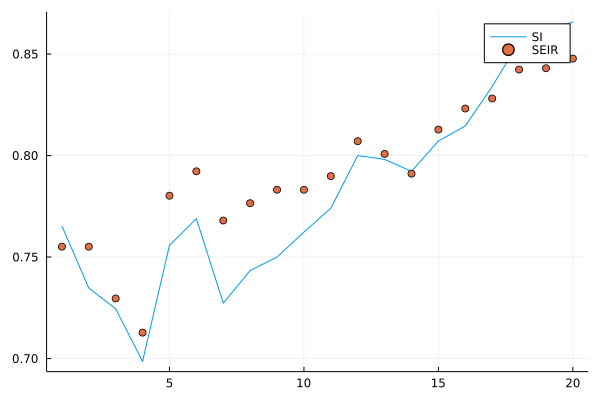

In [4]:
trial = 1
nob=1
plot(AUSI[nob,trial,:], label = "SI")
#plot!(AUSEIR1[nob,trial,:], label = "SEIR1")
scatter!(AUSEIR[nob,trial,:], label = "SEIR")

In [5]:
planted[nob,trial,:]

20-element Vector{Float64}:
 0.02
 0.02
 0.02
 0.060000000000000005
 0.09
 0.1
 0.12000000000000001
 0.12000000000000001
 0.12000000000000001
 0.12000000000000001
 0.14
 0.15
 0.18
 0.23
 0.27
 0.33
 0.37999999999999995
 0.42000000000000004
 0.46
 0.48000000000000004

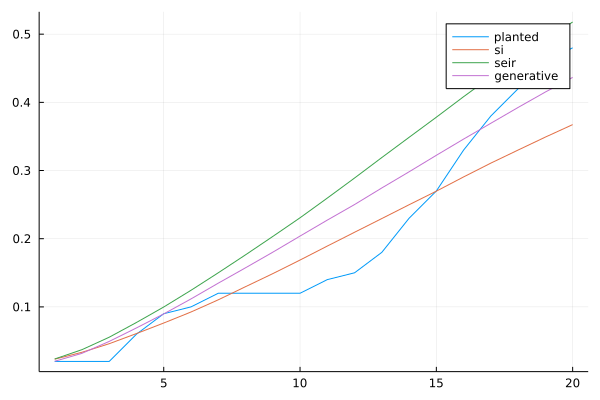

In [6]:
plot(planted[nob,trial,:], label = "planted")
plot!(n_si[nob,trial,:], label = "si")
plot!(n_seir[nob,trial,:], label = "seir")
plot!(gener[nob,trial,:], label = "generative")

In [7]:
ob = 1
p1=plot(avg(AUSI[ob,:,:])', ribbon=SIErr[ob,:], fillalpha=0.3,color="red", ylims=(0.5,1),label="SI",title="nobs=N/10")
p1=plot!(avg(AUSEIR[ob,:,:])',ribbon=SEIRErr[ob,:], fillalpha=0.3,color="blue", label="SEIR",xlabel="time")
p1=plot!(avg(AUSEIR1[ob,:,:])',ribbon=SEIR1Err[ob,:], fillalpha=0.3,color="green", label="Generative",ylabel="AUC")


LoadError: UndefVarError: SIErr not defined

In [8]:
SIErr = zeros(nobstot,T)
SEIRErr = zeros(nobstot,T)
SEIR1Err = zeros(nobstot,T)
n_siErr = zeros(nobstot,T)
n_seirErr = zeros(nobstot,T)
plantedErr = zeros(nobstot,T)
generErr = zeros(nobstot,T)
for nobs=1:nobstot
    SIErr[nobs,:]=[err(AUSI[nobs,:,t]) for t in 1:T]
    SEIRErr[nobs,:]=[err(AUSEIR[nobs,:,t]) for t in 1:T]
    SEIR1Err[nobs,:]=[err(AUSEIR1[nobs,:,t]) for t in 1:T]
    n_siErr[nobs,:] = [err(n_si[nobs,:,t]) for t in 1:T]
    n_seirErr[nobs,:] = [err(n_seir[nobs,:,t]) for t in 1:T]
    plantedErr[nobs,:] = [err(planted[nobs,:,t]) for t in 1:T]
    generErr[nobs,:] = [err(gener[nobs,:,t]) for t in 1:T]
end

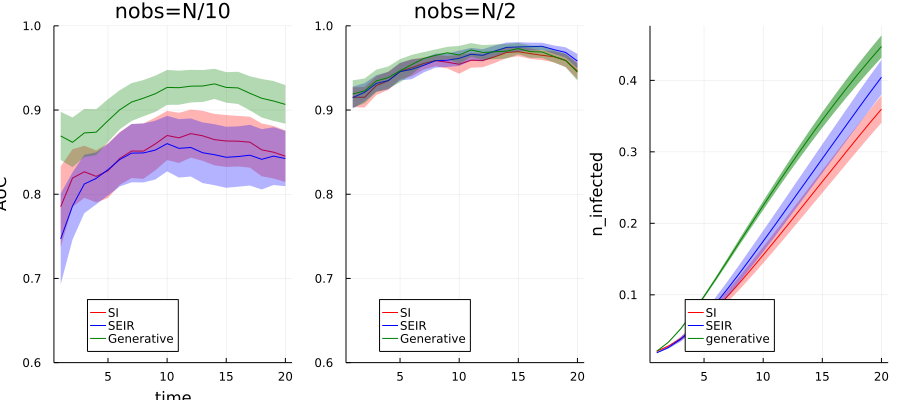

In [9]:
ob=1
p1=plot(avg(AUSI[ob,:,:])', ribbon=SIErr[ob,:], fillalpha=0.3,color="red", ylims=(0.6,1),label="SI",title="nobs=N/10")
p1=plot!(avg(AUSEIR[ob,:,:])',ribbon=SEIRErr[ob,:], fillalpha=0.3,color="blue", label="SEIR",xlabel="time")
p1=plot!(avg(AUSEIR1[ob,:,:])',ribbon=SEIR1Err[ob,:], fillalpha=0.3,color="green", label="Generative",ylabel="AUC")

ob=2  
p2=plot(avg(AUSI[ob,:,:])', ribbon=SIErr[ob,:],fillalpha=0.3, color="red", ylims=(0.6,1),label="SI",title="nobs=N/2")
p2=plot!(avg(AUSEIR[ob,:,:])',ribbon=SEIRErr[ob,:],fillalpha=0.3, color="blue", label="SEIR") 
p2=plot!(avg(AUSEIR1[ob,:,:])',ribbon=SEIR1Err[ob,:], fillalpha=0.3,color="green", label="Generative") 


#p3=plot(avg(planted[ob,:,:])', ribbon=plantedErr[ob,:], fillalpha=0.3,label="planted",xlabel="time",c="black")
p3=plot(avg(n_si[ob,:,:])',ribbon=n_siErr[ob,:],fillalpha=0.3, label="SI",ylabel="n_infected",c="red")
p3=plot!(avg(n_seir[ob,:,:])',ribbon=n_seirErr[ob,:], fillalpha=0.3,label="SEIR",c="blue")
p3=plot!(avg(gener[ob,:,:])',ribbon=generErr[ob,:],label="generative",c="green")

plot(p1, p2, p3, size=(900,400), layout = (1, 3),legend=:bottom)
#savefig("./ModelSelection/SEIRvsSI.png")

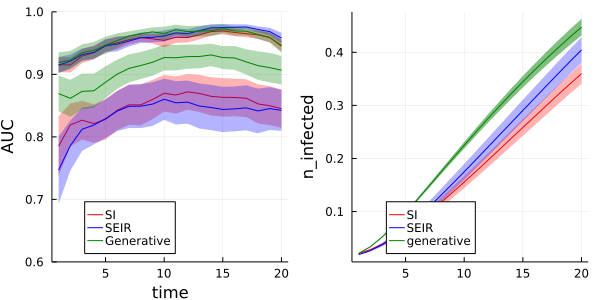

In [10]:
ob=1
p1=plot(avg(AUSI[ob,:,:])', ribbon=SIErr[ob,:], fillalpha=0.3,color="red", ylims=(0.6,1),label="SI")
p1=plot!(avg(AUSEIR[ob,:,:])',ribbon=SEIRErr[ob,:], fillalpha=0.3,color="blue", label="SEIR",xlabel="time")
p1=plot!(avg(AUSEIR1[ob,:,:])',ribbon=SEIR1Err[ob,:], fillalpha=0.3,color="green", label="Generative",ylabel="AUC")

ob=2  
p1=plot!(avg(AUSI[ob,:,:])', ribbon=SIErr[ob,:],fillalpha=0.3, color="red", ylims=(0.6,1),label=false)
p1=plot!(avg(AUSEIR[ob,:,:])',ribbon=SEIRErr[ob,:],fillalpha=0.3, color="blue", label=false) 
p1=plot!(avg(AUSEIR1[ob,:,:])',ribbon=SEIR1Err[ob,:], fillalpha=0.3,color="green", label=false) 


#p3=plot(avg(planted[ob,:,:])', ribbon=plantedErr[ob,:], fillalpha=0.3,label="planted",xlabel="time",c="black")
p3=plot(avg(n_si[ob,:,:])',ribbon=n_siErr[ob,:],fillalpha=0.3, label="SI",ylabel="n_infected",c="red")
p3=plot!(avg(n_seir[ob,:,:])',ribbon=n_seirErr[ob,:], fillalpha=0.3,label="SEIR",c="blue")
p3=plot!(avg(gener[ob,:,:])',ribbon=generErr[ob,:],label="generative",c="green")

plot(p1, p3, size=(600,300), layout = (1, 2),legend=:bottom)
#savefig("./ModelSelection/SEIRvsSI.png")

## SimulatedGraphs Inference

In [11]:
try_max = 40
nobs_set = [0,1,2,5,10,40]
pahtstring = "./SimulatedGraphs/SimulatedGraphData/"
T = 20
AUcau = zeros(try_max,length(nobs_set),T)
AUsoft = zeros(try_max,length(nobs_set),T)
AUsib = zeros(try_max,length(nobs_set),T)
AUheu = zeros(try_max,length(nobs_set),T)
AUmh = zeros(try_max,length(nobs_set),T)
AUMF = zeros(try_max,length(nobs_set),T)
for trial = 1:try_max
    for r = 1:length(nobs_set) 
        nobs = nobs_set[r]
        AUcau[trial,r,:] = readdlm("$(pahtstring)try$(trial)nobs$(nobs)cau.txt") 
        AUsoft[trial,r,:] = readdlm("$(pahtstring)try$(trial)nobs$(nobs)soft.txt")
        AUsib[trial,r,:] = readdlm("$(pahtstring)try$(trial)nobs$(nobs)sib.txt")
        AUheu[trial,r,:] = readdlm("$(pahtstring)try$(trial)nobs$(nobs)fre.txt")
        AUmh[trial,r,:] = readdlm("$(pahtstring)try$(trial)nobs$(nobs)mc.txt")
        AUMF[trial,r,:] = readdlm("$(pahtstring)try$(trial)nobs$(nobs)mf.txt")
    end
end

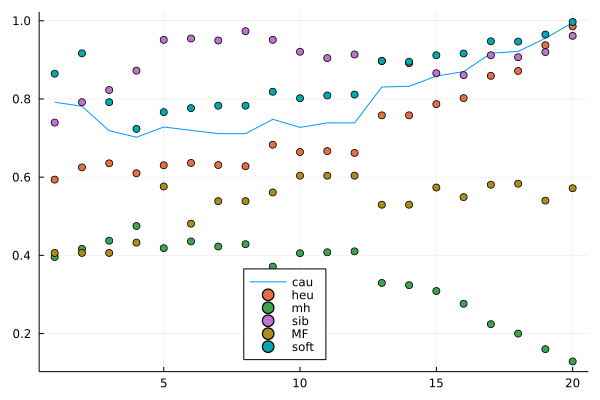

In [12]:
tr, obs = 3,2
plot(AUcau[tr,obs,:],label="cau")
scatter!(AUheu[tr,obs,:],label="heu")
scatter!(AUmh[tr,obs,:],label="mh")
scatter!(AUsib[tr,obs,:],label="sib")
scatter!(AUMF[tr,obs,:],label="MF")
scatter!(AUsoft[tr,obs,:],label="soft", legend = :bottom)

#ylims!(0.5,1.01)

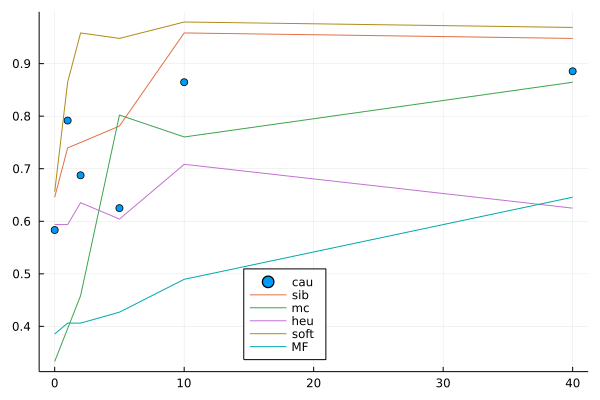

In [13]:
tr, time = 3 , 1
scatter(nobs_set,AUcau[tr,:,time],label="cau", legend=:bottom)
plot!(nobs_set,AUsib[tr,:,time], label = "sib")
plot!(nobs_set,AUmh[tr,:,time], label = "mc")
plot!(nobs_set,AUheu[tr,:,time], label = "heu")
plot!(nobs_set,AUsoft[tr,:,time], label="soft")
plot!(nobs_set,AUMF[tr,:,time], label="MF")

#savefig("../provaSoft")
#ylims!(0.5,1.01)

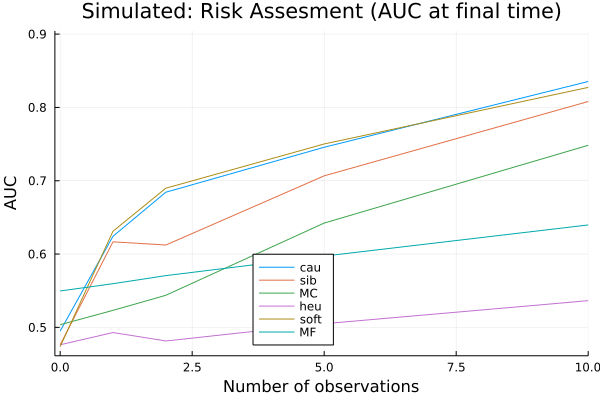

In [20]:
t = 1
plot(nobs_set,avg(AUcau[:,:,t])',label="cau",title="Simulated: Risk Assesment (AUC at final time)")
plot!(nobs_set ,avg(AUsib[:,:,t])',label="sib",xlabel="Number of observations")
plot!(nobs_set ,avg(AUmh[:,:,t])',fillalpha=0.3,label="MC",ylabel="AUC",legend=:bottom)
plot!(nobs_set ,avg(AUheu[:,:,t])',fillalpha=0.3,label="heu")
plot!(nobs_set ,avg(AUsoft[:,:,t])',fillalpha=0.3,label="soft")
plot!(nobs_set ,avg(AUMF[:,:,t])',fillalpha=0.3,label="MF",xlims=(-0.1,10))

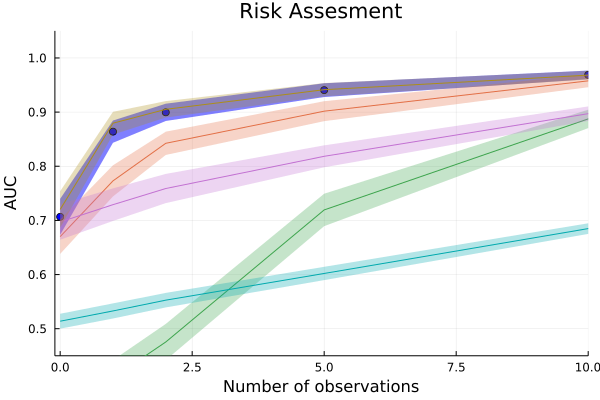

In [45]:
cauErr=[err(AUcau[:,r,end]) for r in 1:length(nobs_set)]
softErr=[err(AUsoft[:,r,end]) for r in 1:length(nobs_set)]
mhErr=[err(AUmh[:,r,end]) for r in 1:length(nobs_set)]
sibErr=[err(AUsib[:,r,end]) for r in 1:length(nobs_set)]
heuErr=[err(AUheu[:,r,end]) for r in 1:length(nobs_set)]
mfErr=[err(AUMF[:,r,end]) for r in 1:length(nobs_set)]

p1=scatter(nobs_set,avg(AUcau[:,:,end])',ribbon=cauErr,c=:blue,fillalpha=0.5,label="cau",title="Risk Assesment")
p1=plot!(nobs_set ,avg(AUsib[:,:,end])',ribbon=sibErr,fillalpha=0.3,label="sib",xlabel="Number of observations")
p1=plot!(nobs_set ,avg(AUmh[:,:,end])',ribbon=mhErr,fillalpha=0.3,label="MC",ylabel="AUC",legend=:bottom)
p1=plot!(nobs_set ,avg(AUheu[:,:,end])',ribbon=heuErr,fillalpha=0.3,label="heu")
p1=plot!(nobs_set ,avg(AUsoft[:,:,end])',ribbon=softErr,fillalpha=0.3,label="soft")
p1=plot!(nobs_set ,avg(AUMF[:,:,end])',ribbon=mfErr,fillalpha=0.3,label="MF",xlims=(-0.1,10),legend=false)
ylims!(0.45,1.05)
#savefig("./SimulatedGraphs/SimulatedGraphPictures/RiskAssesment.png")

In [50]:
cauErr=[err(AUcau[:,r,1]) for r in 1:length(nobs_set)]
softErr=[err(AUsoft[:,r,1]) for r in 1:length(nobs_set)]
mhErr=[err(AUmh[:,r,1]) for r in 1:length(nobs_set)]
sibErr=[err(AUsib[:,r,1]) for r in 1:length(nobs_set)]
heuErr=[err(AUheu[:,r,1]) for r in 1:length(nobs_set)]
mfErr=[err(AUMF[:,r,1]) for r in 1:length(nobs_set)]

nobs_set0 = nobs_set .+ 0.1

p2=scatter(nobs_set0 ,avg(AUcau[:,:,1])',ribbon=cauErr,c=:blue,fillalpha=0.3,label="cau",title="Zero Patient")
p2=plot!(nobs_set0 ,avg(AUsib[:,:,1])',ribbon=sibErr,fillalpha=0.3,label="sib",xlabel="Number of observations")
p2=plot!(nobs_set0 ,avg(AUmh[:,:,1])',ribbon=mhErr,fillalpha=0.3,label="MC",ylabel="AUC",legend=:bottom)
p2=plot!(nobs_set0 ,avg(AUheu[:,:,1])',ribbon=heuErr,fillalpha=0.3,label="heu")
p2=plot!(nobs_set0 .+ 0,avg(AUsoft[:,:,1])',ribbon=softErr,fillalpha=0.3,label="soft")
p2=plot!(nobs_set0 ,avg(AUMF[:,:,1])',ribbon=mfErr,fillalpha=0.3,label="MF",legend=:top)
ylims!(0.45,1)
#xlims!(0,40)
p2=xaxis!(:log)
plot(p1,p2,layout=(1,2),size=(550,300))
savefig("./SimulatedGraphs/SimulatedGraphPictures/ZeroPatient.png")

## Hyperparameters Inference

In [38]:
d1=readdlm("./Hyperparams/descent.txt")
d2=readdlm("./Hyperparams/descent2.txt")
d3=readdlm("./Hyperparams/descent3.txt")
d4=readdlm("./Hyperparams/descent4.txt")
d5=readdlm("./Hyperparams/descent5.txt")
fe=readdlm("./Hyperparams/hyperparams.txt");

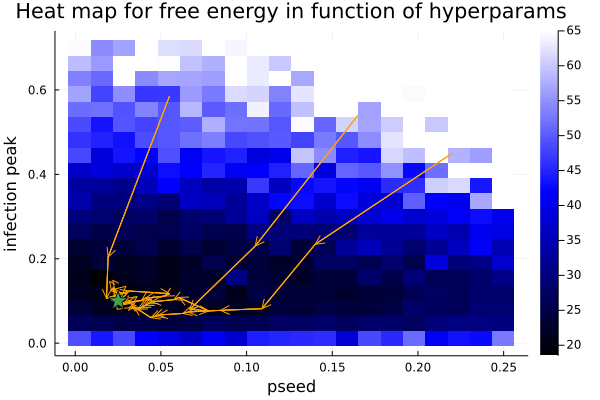

In [139]:
p1 = heatmap(LinRange(1/400,0.25,20),LinRange(0.01,0.7,20),fe',c=[:black,:blue,:white], xlabel="pseed",clim=(minimum(fe),65),ylabel="infection peak",title="Heat map for free energy in function of hyperparams")
col =:orange
for st=1:10:100
    #p1 = plot!(d1[st:10:st+10,1],d1[st:10:st+10,2],c=col,arrow=true)
    p1 = plot!(d2[st:10:st+10,1],d2[st:10:st+10,2],c=col,arrow=true)
    p1 = plot!(d3[st:10:st+10,1],d3[st:10:st+10,2],c=col,arrow=true)
    p1 = plot!(d4[st:10:st+10,1],d4[st:10:st+10,2],c=col,arrow=true)
end

#plot!(d1[1:10:end,1],d1[1:10:end,2],c=col,arrow=true)
plot!(d2[1:10:end,1],d2[1:10:end,2],c=col)
plot!(d3[1:10:end,1],d3[1:10:end,2],c=col)
plot!(d4[1:10:end,1],d4[1:10:end,2],c=col)
#plot!(d5[1:10:end,1],d5[1:10:end,2],c=:orange)
#=scatter!([d1[end,1]],[d1[end,2]])
scatter!([d2[end,1]],[d2[end,2]])
scatter!([d3[end,1]],[d3[end,2]])
scatter!([d4[end,1]],[d4[end,2]],legend=false)=#
#scatter!([d5[end,1]],[d5[end,2]],legend=false)
scatter!([1/40,],[0.1],label="True",shape=:star,markersize=10,legend=false)
plot(p1)
#savefig("./Hyperparams/Hyperdescent.png")    

## Hyperparams Comparison

In [18]:
fe_cau=readdlm("./Hyperparams/hyper_fe_cau.txt")
fe_soft=readdlm("./Hyperparams/hyper_fe_soft.txt");
fe_Ssoft=readdlm("./Hyperparams/hyper_fe_Ssoft.txt");

In [19]:
heatmap(LinRange(1/400,0.25,20),LinRange(0.01,0.7,20),log.(fe_cau), xlabel="pseed", ylabel="infection peak")
scatter!([1/40],[0.1],label="True")
savefig("./Hyperparams/HyperCauF.pdf")

In [20]:
heatmap(LinRange(1/400,0.25,20),LinRange(0.01,0.7,20),log.(fe_soft), xlabel="pseed", ylabel="infection peak")
scatter!([1/40],[0.1],label="True")
savefig("./Hyperparams/HyperSoftF.pdf")

In [21]:
heatmap(LinRange(1/400,0.25,20),LinRange(0.01,0.7,20),log.(fe_Ssoft), xlabel="pseed", ylabel="infection peak")
scatter!([1/40],[0.1],label="True")
savefig("./Hyperparams/HyperSSoftF.pdf")